# Вебинар 3. Визуализация и анализ данных.

**Подключение библиотек и скриптов**

In [18]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [19]:
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [3]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0,1


In [20]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
City                    int64
dtype: object

### Анализ целевой переменной

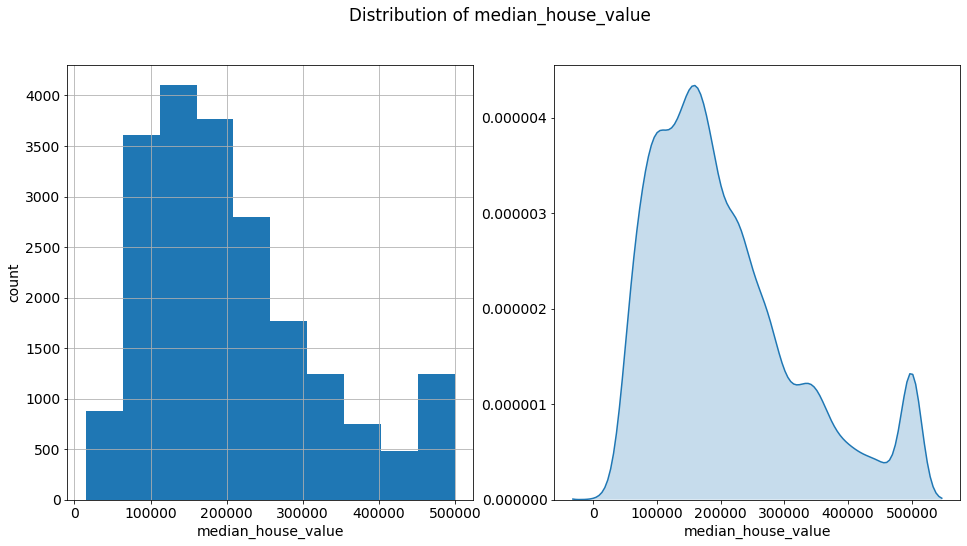

In [21]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist()
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [1]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

NameError: name 'df' is not defined

In [26]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569308,35.631673,28.665746,2635.763081,536.74841,1417.860562,499.539680,3.870671,206855.816909,0.443314,0.316957,0.000242,0.110853,0.128634,0.383527
std,2.003455,2.135854,12.355019,2181.615252,419.45420,1119.445348,382.329753,1.899822,115395.615874,0.496788,0.465302,0.015563,0.313957,0.334802,0.486257
min,-124.350000,32.540000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.00000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.00000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.25000,1701.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


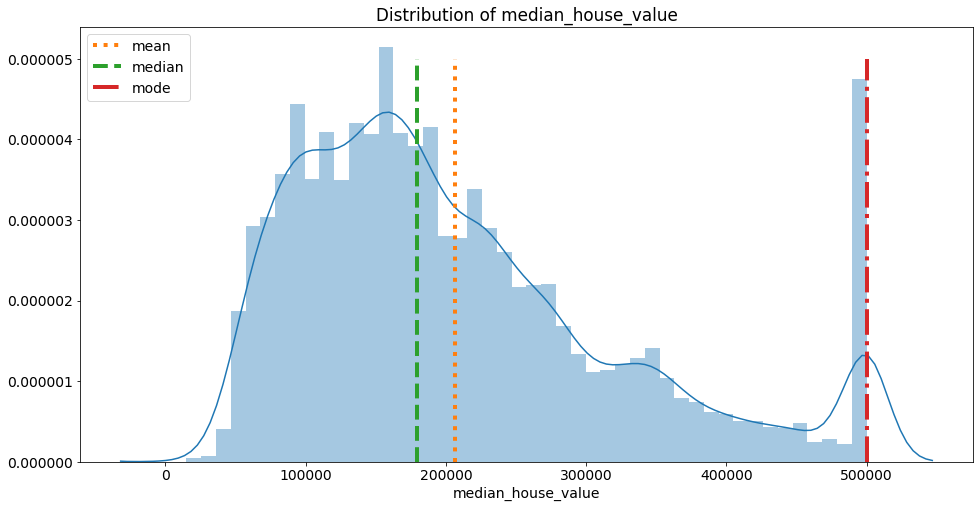

In [22]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

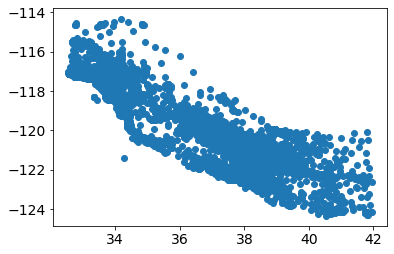

In [27]:
plt.scatter(df['latitude'], df['longitude'])

### Оценка распредения целевой переменной в разрезе других признаков

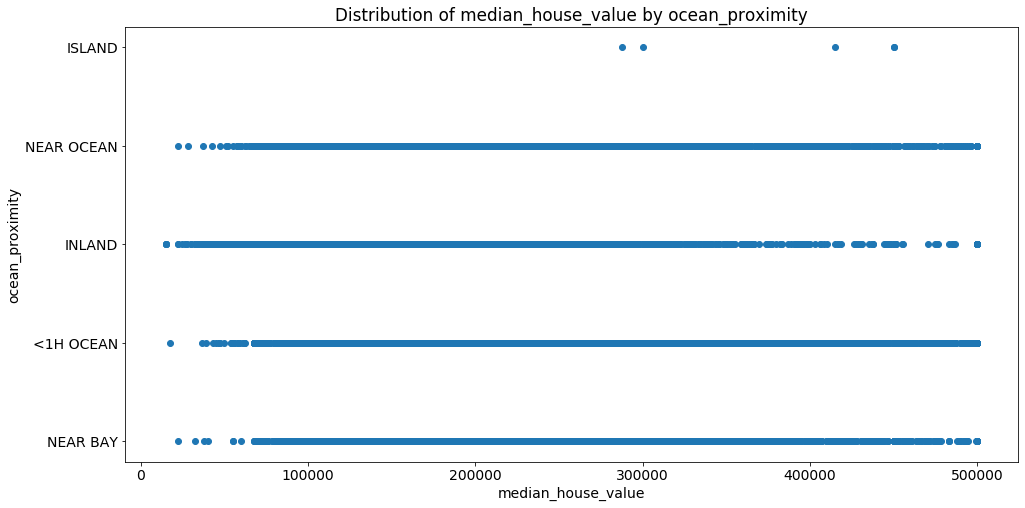

In [9]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Box plot**

In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569308,35.631673,28.665746,2635.763081,536.74841,1417.860562,499.539680,3.870671,206855.816909,0.443314,0.316957,0.000242,0.110853,0.128634,0.383527
std,2.003455,2.135854,12.355019,2181.615252,419.45420,1119.445348,382.329753,1.899822,115395.615874,0.496788,0.465302,0.015563,0.313957,0.334802,0.486257
min,-124.350000,32.540000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.00000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.00000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.25000,1701.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


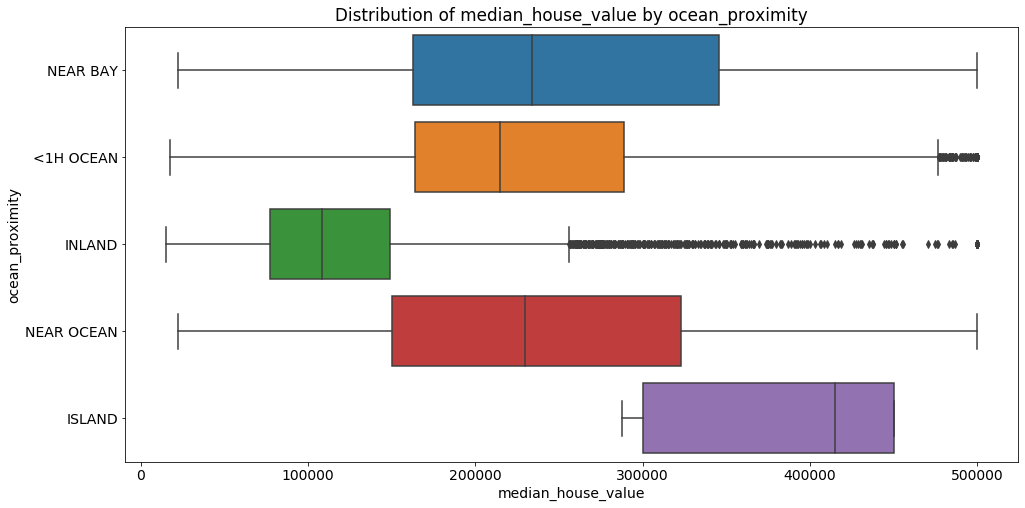

In [28]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Violin plot**

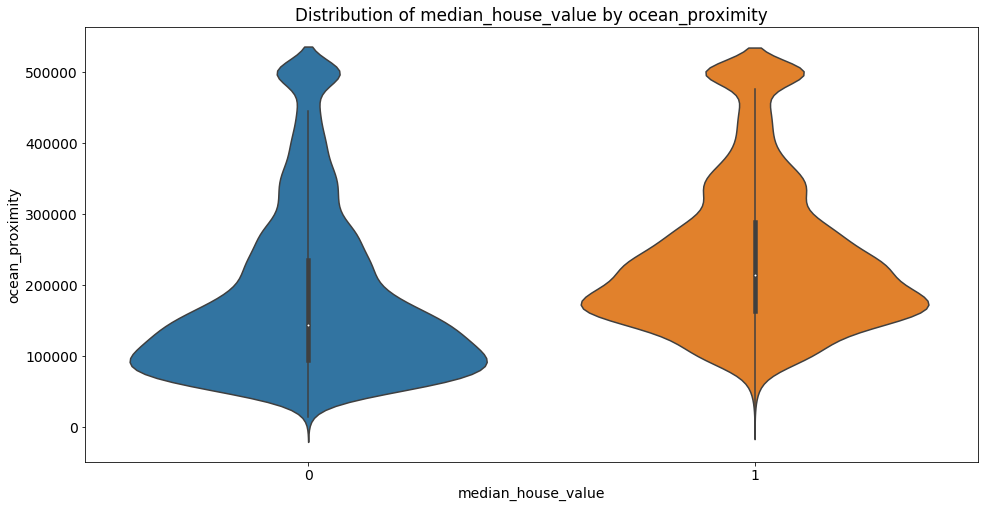

In [41]:
plt.figure(figsize=(16, 8))

sns.violinplot( df['<1H OCEAN'], df['median_house_value'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Анализ признаков

**Количественные признаки**

In [33]:
df_num_features = df.select_dtypes(include='float64')
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [31]:
df_num_features.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924522,-0.104805,0.044732,0.069325,0.099308,0.055455,-0.015171,-0.045980
latitude,-0.924522,1.000000,0.008864,-0.036090,-0.066563,-0.107701,-0.071050,-0.079691,-0.144031
housing_median_age,-0.104805,0.008864,1.000000,-0.351839,-0.311809,-0.285721,-0.296206,-0.115577,0.104572
total_rooms,0.044732,-0.036090,-0.351839,1.000000,0.927151,0.844284,0.918484,0.198050,0.134153
total_bedrooms,0.069325,-0.066563,-0.311809,0.927151,1.000000,0.861957,0.974463,-0.007596,0.049570
population,0.099308,-0.107701,-0.285721,0.844284,0.861957,1.000000,0.892793,0.004553,-0.024236
households,0.055455,-0.071050,-0.296206,0.918484,0.974463,0.892793,1.000000,0.013033,0.065843
median_income,-0.015171,-0.079691,-0.115577,0.198050,-0.007596,0.004553,0.013033,1.000000,0.688075
median_house_value,-0.045980,-0.144031,0.104572,0.134153,0.049570,-0.024236,0.065843,0.688075,1.000000


In [32]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3842, dtype: int64

In [35]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569308,35.631673,28.665746,2635.763081,536.74841,1417.860562,499.539680,3.870671,206855.816909,0.443314,0.316957,0.000242,0.110853,0.128634,0.383527
std,2.003455,2.135854,12.355019,2181.615252,419.45420,1119.445348,382.329753,1.899822,115395.615874,0.496788,0.465302,0.015563,0.313957,0.334802,0.486257
min,-124.350000,32.540000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.00000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.00000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.25000,1701.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


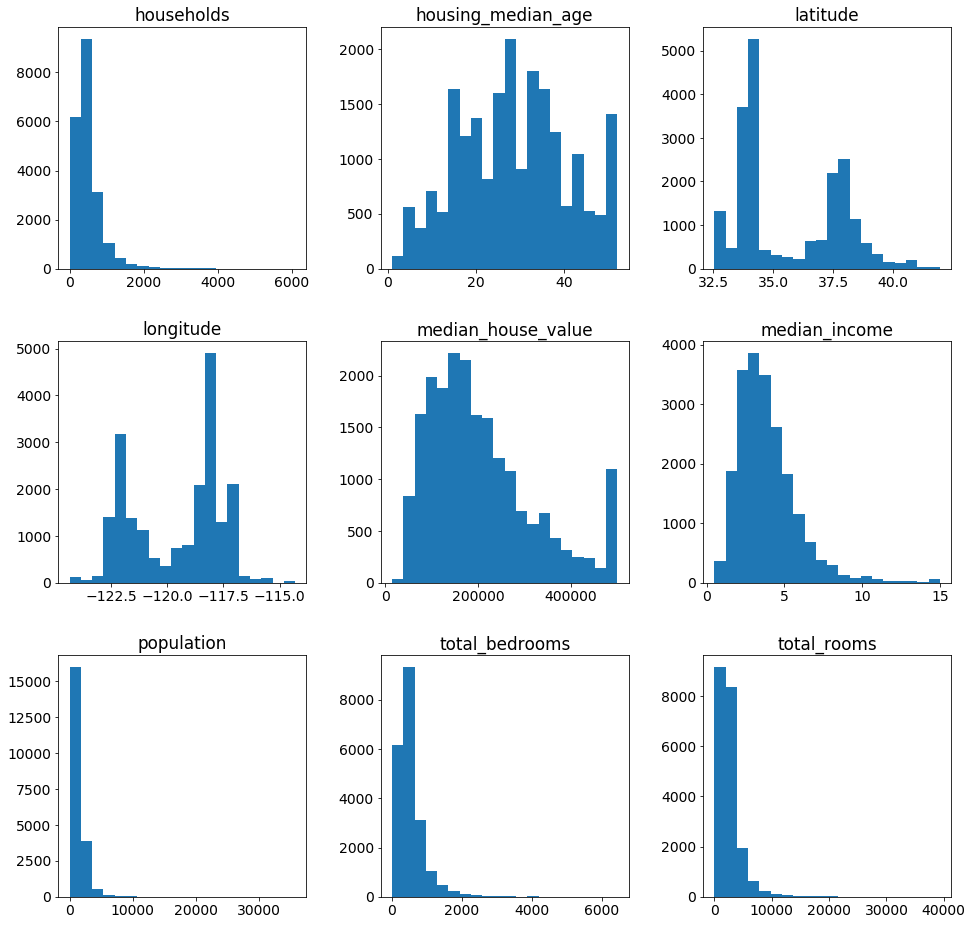

In [34]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

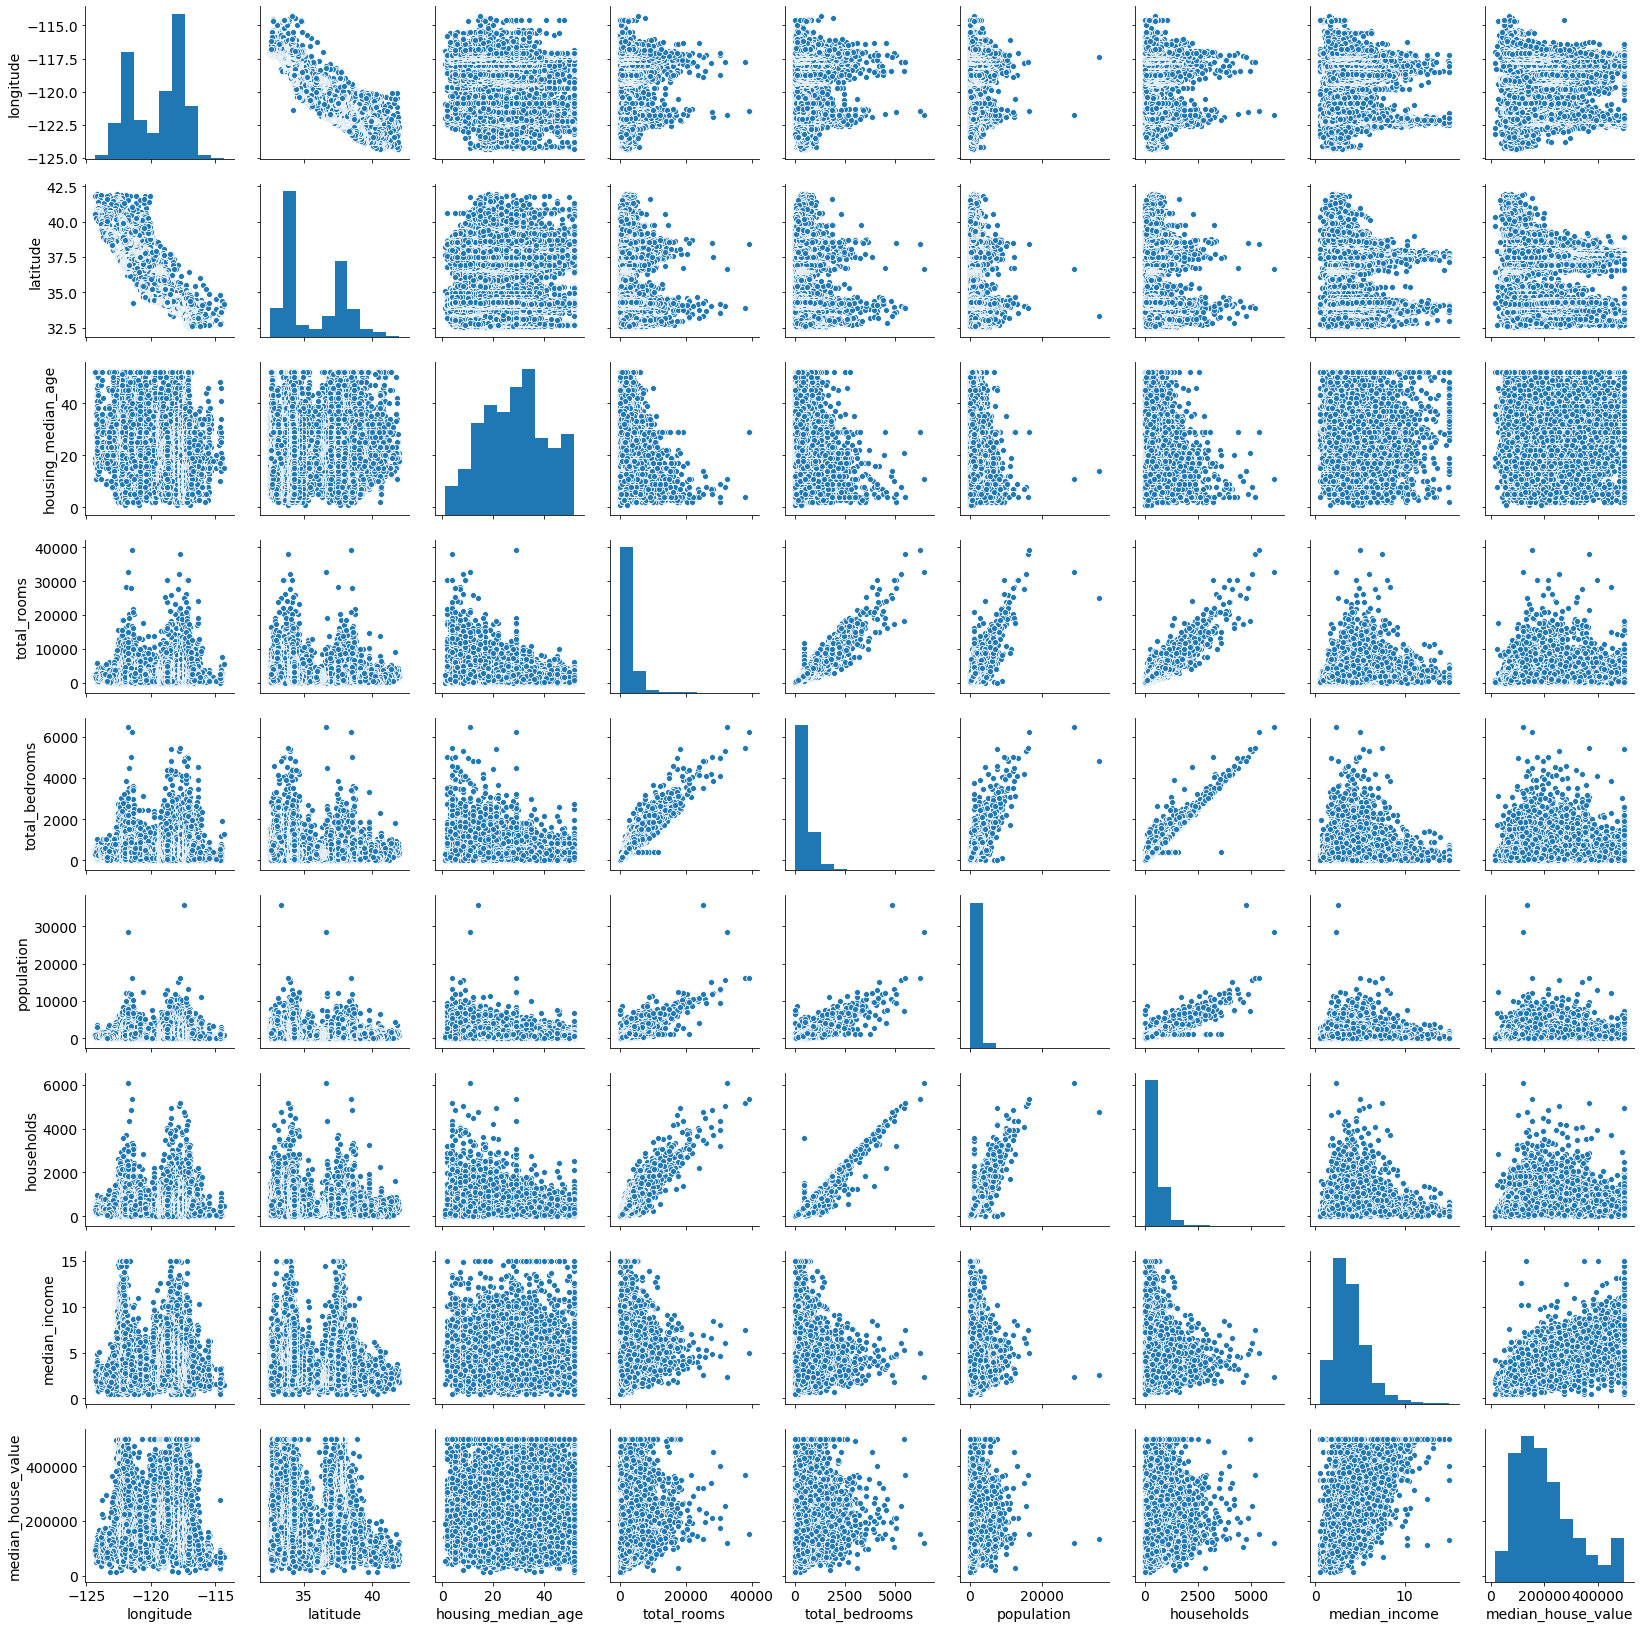

In [23]:
sns.pairplot(df_num_features)
plt.show()

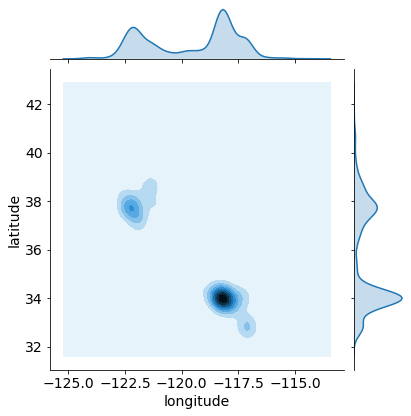

In [52]:
sns.jointplot(df['longitude'], df['latitude'],kind='kde' )

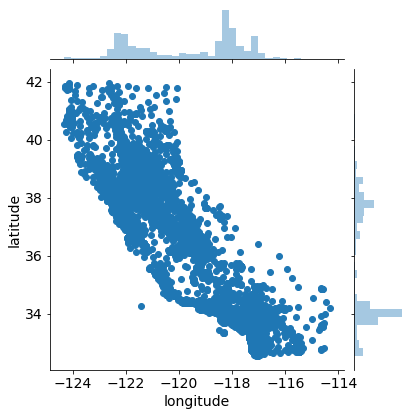

In [53]:
sns.jointplot(df['longitude'], df['latitude'],)

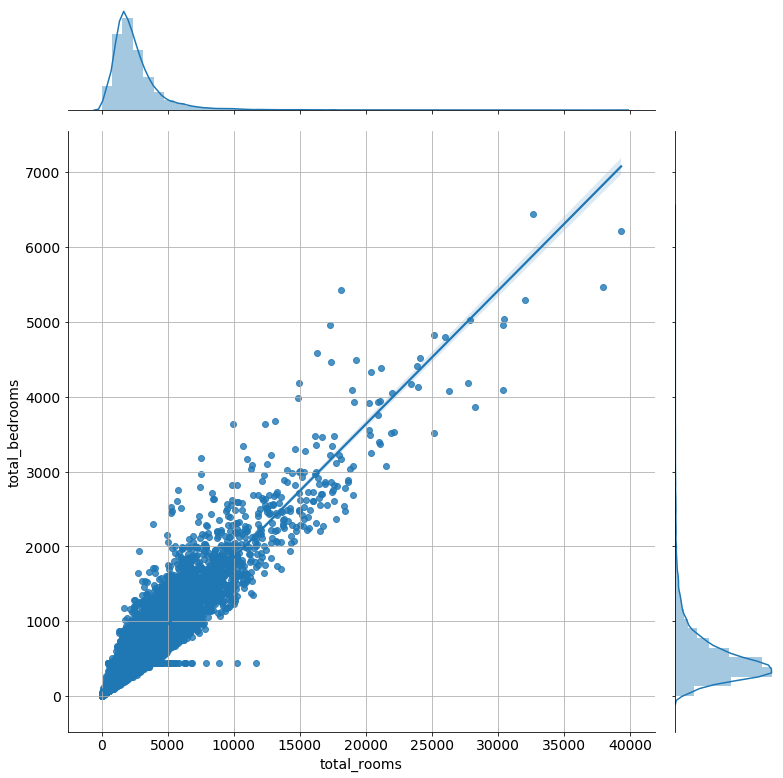

In [30]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)
plt.grid(True)
plt.show()

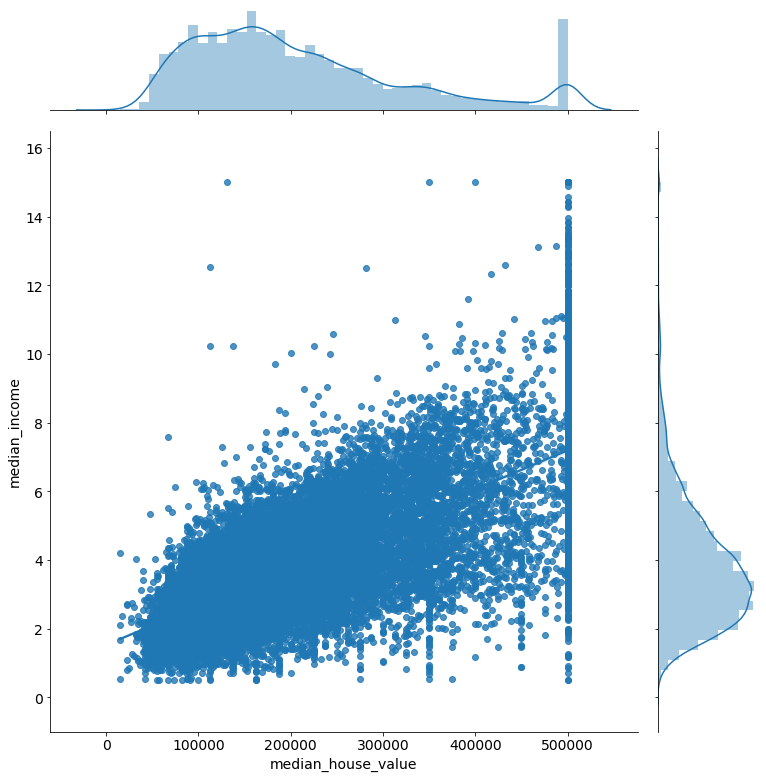

In [37]:
grid = sns.jointplot(df['median_house_value'], df['median_income'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Бинарные признаки**

In [38]:
df_bin_features = df.select_dtypes(include='int64')

In [39]:
df_bin_features

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
0,0,0,0,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,0,1
3,0,0,0,1,0,1
4,0,0,0,1,0,1
...,...,...,...,...,...,...
20635,0,1,0,0,0,1
20636,0,1,0,0,0,1
20637,0,1,0,0,0,1
20638,0,1,0,0,0,1


In [43]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569308,35.631673,28.665746,2635.763081,536.74841,1417.860562,499.539680,3.870671,206855.816909,0.443314,0.316957,0.000242,0.110853,0.128634,0.383527
std,2.003455,2.135854,12.355019,2181.615252,419.45420,1119.445348,382.329753,1.899822,115395.615874,0.496788,0.465302,0.015563,0.313957,0.334802,0.486257
min,-124.350000,32.540000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.00000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.00000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.25000,1701.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# sns.set(font_scale=1.4)
plt.figure(figsize = (16,16))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

### Матрица корреляций

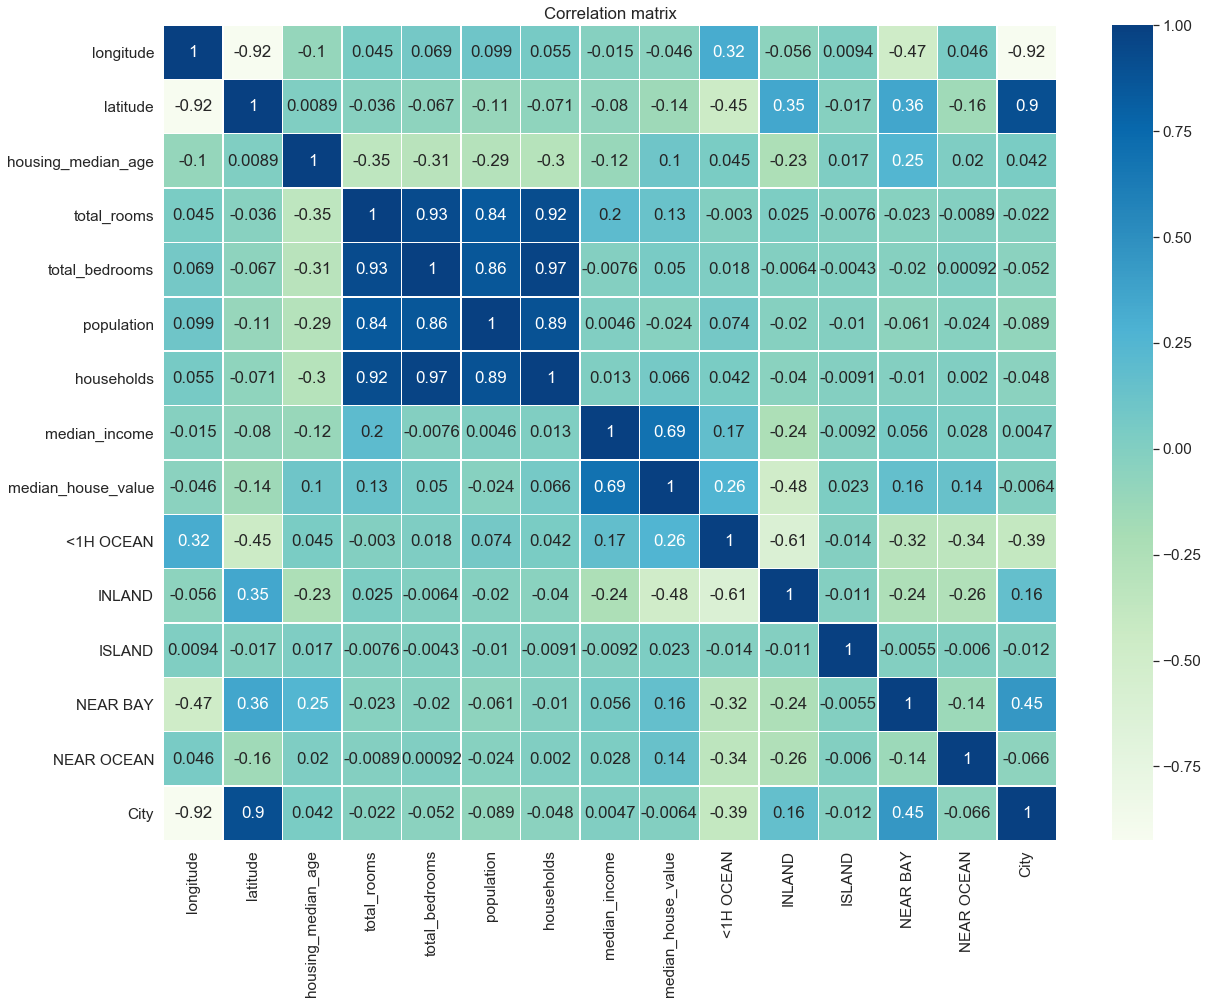

In [56]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Визуализация данных на карте

In [42]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

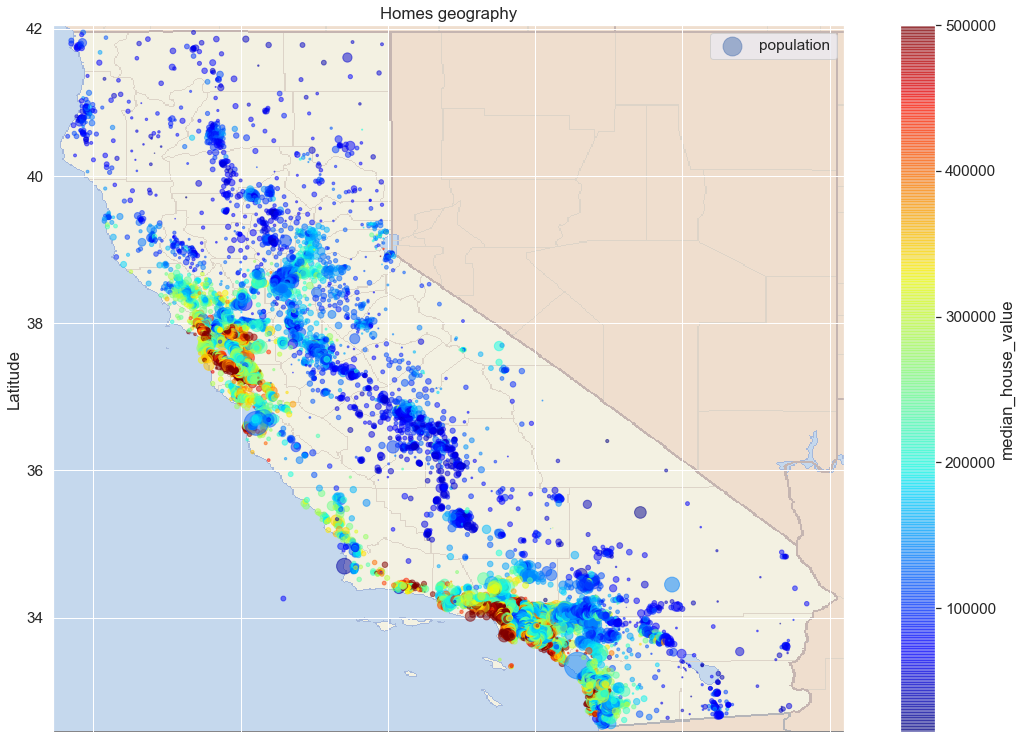

In [89]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()